### Exercise 2: Wine Quality

#### Part 1: Data preparation and analysis

##### Load the Wine Quality dataset (UCI Machine Learning Repository). Feature analysis of the dataset, check and hundle missing data, distribution of classes and data imbalance.

In [23]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, confusion_matrix, plot_roc_curve
import warnings

warnings.filterwarnings("ignore")

wine_quality = fetch_ucirepo(id=186)
features = wine_quality.data.features
targets = wine_quality.data.targets
df = pd.concat([features, targets], axis=1, ignore_index=False)
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### Get the data type of each column in the dataframe.

In [2]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

##### Check duplicate values.

In [3]:
df.nunique()

fixed_acidity           106
volatile_acidity        187
citric_acid              89
residual_sugar          316
chlorides               214
free_sulfur_dioxide     135
total_sulfur_dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

##### Data information.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


##### Get statistically description of the numerical data in the dataframe.

In [5]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


##### Checks the sum of missing values for each column.

In [6]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Distribution of classes and data imbalance.

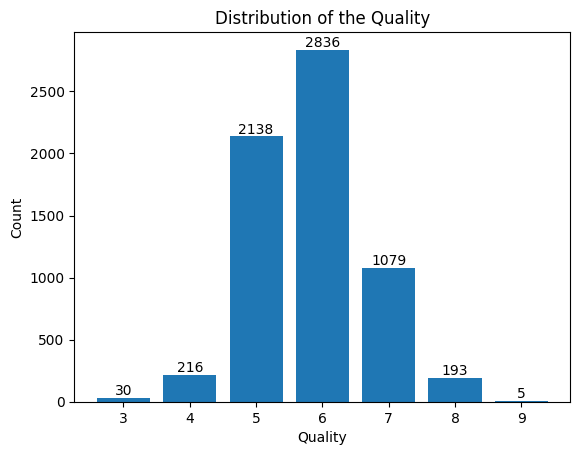

In [7]:
counts = df['quality'].value_counts()
bars = plt.bar(counts.index, counts)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), height, ha='center', va='bottom', fontsize=10)
plt.title('Distribution of the Quality')
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

##### Split the dataset: Split the data into training set (80%) and test set (20%) and normalize numeric variables.

In [8]:
np.random.seed(2)
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Part 2: Build and train model

##### Model implementation and training: Train an SVM with different kernels (linear, RBF) and a Binary Decision Tree with different depths tree.

In [21]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

dt_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_depth_3.fit(X_train, y_train)
dt_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_depth_5.fit(X_train, y_train)
dt_depth_10 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_depth_10.fit(X_train, y_train)

classes = svm_linear.classes_
classes

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

##### Evaluation of the models: Calculate accuracy, F1-score, ROC curve and the confusion matrix for each model. Compare the performance of the two methods.

In [26]:
def evaluate(true_y, y_prob):
    accuracy = accuracy_score(true_y, y_prob)
    f1 = f1_score(true_y, y_prob, average='weighted')
    cm = confusion_matrix(true_y, y_prob)
    return accuracy, f1, cm

y_pred_svm_linear = svm_linear.predict(X_test)
y_pred_svm_rbf = svm_rbf.predict(X_test)

y_pred_dt_depth_3 = dt_depth_3.predict(X_test)
y_pred_dt_depth_5 = dt_depth_5.predict(X_test)
y_pred_dt_depth_10 = dt_depth_10.predict(X_test)

accuracy_svm_linear,f1_svm_linear,cm_svm_linear = evaluate(y_test, y_pred_svm_linear)
accuracy_svm_rbf,f1_svm_rbf,cm_svm_rbf = evaluate(y_test, y_pred_svm_rbf)
accuracy_dt_depth_3,f1_dt_depth_3,cm_dt_depth_3 = evaluate(y_test, y_pred_dt_depth_3)
accuracy_dt_depth_5,f1_dt_depth_5,cm_dt_depth_5 = evaluate(y_test, y_pred_dt_depth_5)
accuracy_dt_depth_10,f1_dt_depth_10,cm_dt_depth_10 = evaluate(y_test, y_pred_dt_depth_10)

results = {
    'SVM (Linear)': [accuracy_svm_linear,f1_svm_linear,cm_svm_linear],
    'SVM (RBF)': [accuracy_svm_rbf,f1_svm_rbf,cm_svm_rbf],
    'Decision Tree (Depth 3)': [accuracy_dt_depth_3,f1_dt_depth_3,cm_dt_depth_3],
    'Decision Tree (Depth 5)': [accuracy_dt_depth_5,f1_dt_depth_5,cm_dt_depth_5],
    'Decision Tree (Depth 10)': [accuracy_dt_depth_10,f1_dt_depth_10,cm_dt_depth_10],
}
results_df = pd.DataFrame(results, index=['accuracy', 'f1', 'cm'])
print(results_df)

                                               SVM (Linear)  \
accuracy                                           0.526154   
f1                                                 0.456766   
cm        [[0, 0, 3, 3, 0, 0, 0], [0, 0, 28, 15, 0, 0, 0...   

                                                  SVM (RBF)  \
accuracy                                           0.561538   
f1                                                 0.522439   
cm        [[0, 0, 1, 5, 0, 0, 0], [0, 0, 29, 14, 0, 0, 0...   

                                    Decision Tree (Depth 3)  \
accuracy                                           0.514615   
f1                                                  0.47533   
cm        [[0, 0, 2, 4, 0, 0, 0], [0, 0, 19, 23, 1, 0, 0...   

                                    Decision Tree (Depth 5)  \
accuracy                                           0.529231   
f1                                                 0.494801   
cm        [[0, 0, 2, 4, 0, 0, 0], [0, 1, 21, 20, 1, 

#### Part 3: Optimization and Comparison